In [67]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
print(nx.__version__)
#import sklearn as skl
import scipy.stats
import scipy.odr as odr

import os
import re
print(os.getcwd())
from pathlib import Path

from utils.paths import get_info, get_subjects
from utils.graphs import delete_rois

2.8.4
C:\Users\Tomasz\OneDrive - Uniwersytet Jagielloński\Konfy\Brainhack 2022\Brainhack_connectomics\network_stats


In [5]:
import os
from subprocess import Popen, STDOUT, PIPE
import logging
import re

def check_path(path):
    """
    Check if specified path exist. Make directory in case it doesn't.
    """
    if not os.path.isdir(path):
        os.system("mkdir -p {}".format(path))
    return path

def get_subjects(data_path, session='*', subject_ID='*', format='.csv', exclude =''):
    """
    Get all the subjects specified in directory.
    """

    logging.info(" Target Dataset: " + data_path)
    output = Popen(f"find {data_path if len(data_path)>0 else '.'} ! -wholename '{exclude}' -wholename '*{session}/*{subject_ID}*{format}'", shell=True, stdout=PIPE)
    print(output)
    files= str(output.stdout.read()).removeprefix('b\'').removesuffix('\'').removesuffix('\\n').split('\\n')
    logging.info(" Found " + str(len(files)) + " subject(s)")
    return files

def get_info(f):
    """
    Get all the relevant info from the file.
    """
    
    f = f.removeprefix("\"").removeprefix("\'").removesuffix("\"").replace('./', '')
    path = f.removesuffix(f.split('/')[-1])
    name = (f.split('/')[-1]).split('.')[0] # just the file name (without extension)
    subject_ID = str(re.findall("sub-...[0-9]+", name)[0])
    session = str(re.findall("_ses-.+_", name)[0]) 
    return path, session, subject_ID, name

if __name__ == '__main__':
    pass

In [5]:
datadir_str = "../../Brainhack-Krakow (project 3 - network similarities)/Brain-Network-Structural-Topology/Data"
print(os.listdir(datadir_str))

['Atlas', 'Glioma', 'Stroke']


In [6]:
def getPATnum(fname):
    return int(re.search("sub-PAT([0-9]+)", fname)[1])

basedir_stroke_acute = Path(datadir_str, "Stroke/ses-acute")
basedir_stroke_followup = Path(datadir_str, "Stroke/ses-followup")
basedir_stroke_followup2 = Path(datadir_str, "Stroke/ses-followup-2")

fnames_stroke_acute = [
    "sub-PAT134_ses-acute_CM.csv",
    "sub-PAT145_ses-acute_CM.csv",
    "sub-PAT148_ses-acute_CM.csv",
    "sub-PAT151_ses-acute_CM.csv",
    "sub-PAT154_ses-acute_CM.csv",
    "sub-PAT155_ses-acute_CM.csv",
    "sub-PAT161_ses-acute_CM.csv",
    "sub-PAT162_ses-acute_CM.csv",
    "sub-PAT167_ses-acute_CM.csv",
    "sub-PAT168_ses-acute_CM.csv",
    "sub-PAT175_ses-acute_CM.csv",
    "sub-PAT177_ses-acute_CM.csv",
    "sub-PAT187_ses-acute_CM.csv",
    "sub-PAT190_ses-acute_CM.csv",
    "sub-PAT191_ses-acute_CM.csv",
    "sub-PAT194_ses-acute_CM.csv",
    "sub-PAT196_ses-acute_CM.csv"
]

fnames_stroke_followup = [
    "sub-PAT100_ses-followup_CM.csv",
    "sub-PAT107_ses-followup_CM.csv",
    "sub-PAT109_ses-followup_CM.csv",
    "sub-PAT116_ses-followup_CM.csv",
    "sub-PAT124_ses-followup_CM.csv",
    "sub-PAT134_ses-followup_CM.csv",
    "sub-PAT145_ses-followup_CM.csv",
    "sub-PAT148_ses-followup_CM.csv",
    "sub-PAT151_ses-followup_CM.csv",
    "sub-PAT155_ses-followup_CM.csv",
    "sub-PAT161_ses-followup_CM.csv",
    "sub-PAT162_ses-followup_CM.csv",
    "sub-PAT167_ses-followup_CM.csv",
    "sub-PAT168_ses-followup_CM.csv",
    "sub-PAT175_ses-followup_CM.csv",
    "sub-PAT177_ses-followup_CM.csv",
    "sub-PAT187_ses-followup_CM.csv",
    "sub-PAT190_ses-followup_CM.csv",
    "sub-PAT196_ses-followup_CM.csv",
    "sub-PAT51_ses-followup_CM.csv",
    "sub-PAT52_ses-followup_CM.csv",
    "sub-PAT72_ses-followup_CM.csv",
    "sub-PAT75_ses-followup_CM.csv",
    "sub-PAT78_ses-followup_CM.csv",
    "sub-PAT80_ses-followup_CM.csv",
    "sub-PAT84_ses-followup_CM.csv",
    "sub-PAT98_ses-followup_CM.csv",
    "sub-PAT99_ses-followup_CM.csv"
]

fnames_stroke_followup2 = [
    "sub-PAT100_ses-followup-2_CM.csv",
    "sub-PAT109_ses-followup-2_CM.csv",
    "sub-PAT124_ses-followup-2_CM.csv",
    "sub-PAT145_ses-followup-2_CM.csv",
    "sub-PAT148_ses-followup-2_CM.csv",
    "sub-PAT151_ses-followup-2_CM.csv",
    "sub-PAT155_ses-followup-2_CM.csv",
    "sub-PAT161_ses-followup-2_CM.csv",
    "sub-PAT162_ses-followup-2_CM.csv",
    "sub-PAT168_ses-followup-2_CM.csv",
    "sub-PAT175_ses-followup-2_CM.csv",
    "sub-PAT177_ses-followup-2_CM.csv",
    "sub-PAT187_ses-followup-2_CM.csv",
    "sub-PAT190_ses-followup-2_CM.csv",
    "sub-PAT35_ses-followup-2_CM.csv",
    "sub-PAT43_ses-followup-2_CM.csv",
    "sub-PAT44_ses-followup-2_CM.csv",
    "sub-PAT47_ses-followup-2_CM.csv",
    "sub-PAT51_ses-followup-2_CM.csv",
    "sub-PAT52_ses-followup-2_CM.csv",
    "sub-PAT62_ses-followup-2_CM.csv",
    "sub-PAT78_ses-followup-2_CM.csv",
    "sub-PAT81_ses-followup-2_CM.csv",
    "sub-PAT84_ses-followup-2_CM.csv",
    "sub-PAT87_ses-followup-2_CM.csv",
    "sub-PAT93_ses-followup-2_CM.csv"
]

fnames_all = [*fnames_stroke_acute, *fnames_stroke_followup, *fnames_stroke_followup2]
#print(fnames_all)
patNums_all = set(map(lambda fname: getPATnum(fname), fnames_all))
#subIDs_all_sorted = sorted(list(map(lambda pname: pname[:7] + "0" + pname[7:] if len(pname) == 9 else pname, subIDs_all)))
patNums_all_sorted = sorted(list(patNums_all))

mats_stroke_acute = dict()
mats_stroke_followup = dict()
mats_stroke_followup2 = dict()

patNums_stroke_acute = []
patNums_stroke_followup = []
patNums_stroke_followup2 = []

for patNum in patNums_all:
    #mats_stroke_acute[fname[4:9]] \
#     if Path(basedir_stroke_acute / fname).exists():
#         mats_stroke_acute[f]
#             np.loadtxt(basedir_stroke_acute / fname, delimiter=","))
    patStr = f"sub-PAT{patNum}"
    
    if patStr in " ".join(fnames_stroke_acute):
        fname = f"{patStr}_ses-acute_CM.csv"
        mats_stroke_acute[patNum] = np.loadtxt(basedir_stroke_acute / fname, delimiter=",")
        patNums_stroke_acute.append(patNum)
    
    if patStr in " ".join(fnames_stroke_followup):
        fname = f"{patStr}_ses-followup_CM.csv"
        mats_stroke_followup[patNum] = np.loadtxt(basedir_stroke_followup / fname, delimiter=",")
        patNums_stroke_followup.append(patNum)
        
    if patStr in " ".join(fnames_stroke_followup2):
        fname = f"{patStr}_ses-followup-2_CM.csv"
        mats_stroke_followup2[patNum] = np.loadtxt(basedir_stroke_followup2 / fname, delimiter=",")
        patNums_stroke_followup2.append(patNum)


display(mats_stroke_acute)

mats_stroke_acute, rois_deleted_stroke_acute = delete_rois(np.array([*mats_stroke_acute.values()]))
mats_stroke_followup, rois_deleted_stroke_followup = delete_rois(np.array([*mats_stroke_followup.values()]))
mats_stroke_followup2, rois_deleted_stroke_followup2 = delete_rois(np.array([*mats_stroke_followup2.values()]))
    
display(mats_stroke_acute.shape)

{134: array([[0.000e+00, 1.000e+00, 1.794e+03, ..., 0.000e+00, 2.000e+00,
         0.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         1.000e+00],
        [1.794e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.400e+01,
         2.000e+00],
        [2.000e+00, 1.000e+00, 0.000e+00, ..., 1.400e+01, 0.000e+00,
         6.900e+01],
        [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 6.900e+01,
         0.000e+00]]),
 145: array([[0.00e+00, 4.10e+01, 1.27e+03, ..., 1.00e+00, 1.60e+01, 7.00e+00],
        [4.10e+01, 0.00e+00, 6.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.27e+03, 6.00e+00, 0.00e+00, ..., 1.00e+00, 1.60e+01, 1.00e+00],
        ...,
        [1.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 2.10e+01, 4.10e+01],
        [1.60e+01, 0.00e+00, 1.60e+01, ..., 2.10e+01, 0.00e+00, 4.80e+01],
        [7.00e+00, 0.00e+00, 1.00e+00, ..., 4.1

(17, 166, 166)

## Averaged adjacency matrix graph

In [152]:
matavg_stroke_acute = np.mean(mats_stroke_acute, axis=0)
# display(matavg_stroke_acute)
matavg_stroke_acute_log1p = np.log1p(matavg_stroke_acute)

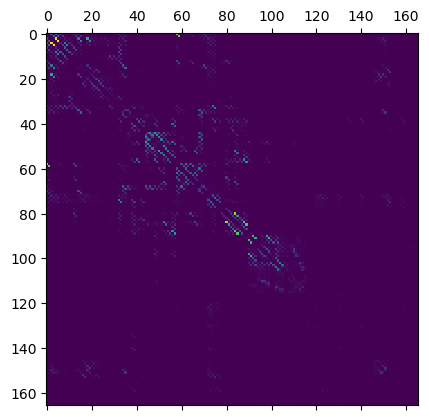

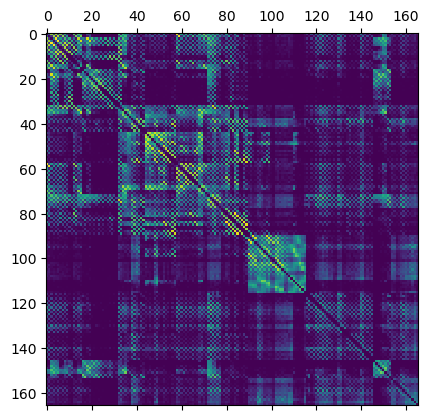

In [153]:
%matplotlib inline
plt.matshow(matavg_stroke_acute)
plt.matshow(np.log1p(matavg_stroke_acute))

In [154]:
Gavg = nx.from_numpy_matrix(matavg_stroke_acute)
Gavg.remove_edges_from(list(nx.selfloop_edges(Gavg)))

Gavg_log1p = nx.from_numpy_matrix(matavg_stroke_acute_log1p)

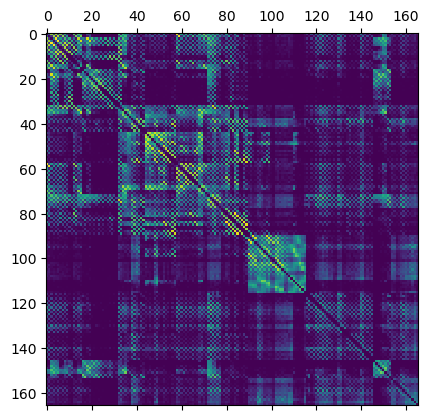

In [155]:
plt.matshow(np.log1p(nx.to_numpy_matrix(Gavg)))

In [118]:
Gavg_nodeStrengths = {nodeLabel: strength for (nodeLabel, strength) in Gavg.degree(weight="weight")}
Gavg_nodeStrengthHist = np.histogram(np.fromiter(Gavg_nodeStrengths.values(), dtype=float),
                                     bins=100)
Gavg_nodeStrengthHist

Gavg_log1p_nodeStrengths = {nodeLabel: strength for (nodeLabel, strength) in Gavg_log1p.degree(weight="weight")}
Gavg_log1p_nodeStrengthHist = np.histogram(np.fromiter(Gavg_log1p_nodeStrengths.values(), dtype=float),
                                     bins=100)
Gavg_log1p_nodeStrengthHist

print(Gavg_log1p_nodeStrengthHist[0].sum())

166


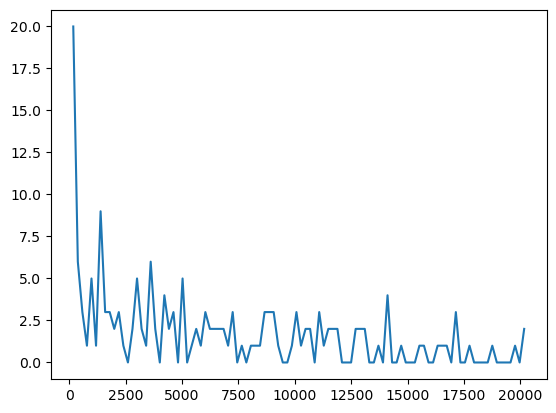

In [108]:
plt.plot(Gavg_nodeStrengthHist[1][:-1],
        Gavg_nodeStrengthHist[0])

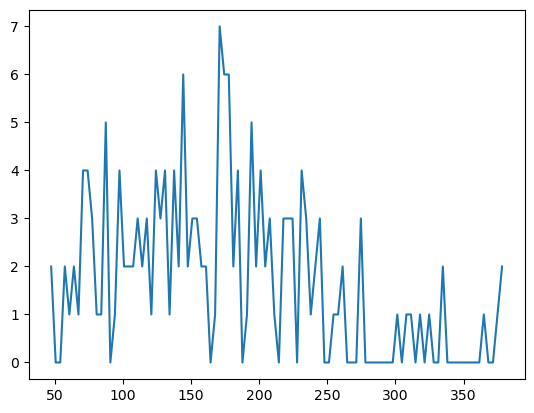

In [111]:
plt.plot(Gavg_log1p_nodeStrengthHist[1][:-1],
        Gavg_log1p_nodeStrengthHist[0])

Might be most sensible to do a strength calculation (or any other) on the joint distribution (combined datasets).

## Node-based statistics patient-wise

In [184]:
for patNum, adjMat in zip(patNums_stroke_acute, mats_stroke_acute):
    g = Gs_stroke_acute[patNum] = nx.from_numpy_matrix(adjMat)
    strengths_stroke_acute[patNum] = {node: strength for node, strength in g.degree(weight="weight")}
    strengths_stroke_acute[None].extend(strengths_stroke_acute[patNum].values())

for patNum, adjMat in zip(patNums_stroke_followup, mats_stroke_followup):
    g = Gs_stroke_followup[patNum] = nx.from_numpy_matrix(adjMat)
    strengths_stroke_followup[patNum] = {node: strength for node, strength in g.degree(weight="weight")}

for patNum, adjMat in zip(patNums_stroke_followup2, mats_stroke_followup2):
    g = Gs_stroke_followup2[patNum] = nx.from_numpy_matrix(adjMat)
    strengths_stroke_followup2[patNum] = {node: strength for node, strength in g.degree(weight="weight")}

## Joint node strength

In [7]:
Gs_stroke_acute = dict()
Gs_stroke_followup = dict()
Gs_stroke_followup2 = dict()

strengths_stroke_acute = dict()
strengths_stroke_acute[None] = []
strengths_stroke_followup = dict()
strengths_stroke_followup2 = dict()

def make_graphs(patNums, mats, log1p=False):
    graphs = dict()
    
    if log1p:
        transFunc = np.log1p
    else:
        transFunc = lambda x: x

    for patNum, adjMat in zip(patNums, mats):
        #print(patNum)
        graphs[patNum] = nx.from_numpy_matrix(transFunc(adjMat))
    
    return graphs


def strengths_joint(graphDict, normalize=False):
    strengths = []
    
    for patNum, g in graphDict.items():
        #print(g.degree)
        strengths.extend(map(lambda p: p[1], g.degree(weight="weight")))
    
    if normalize:
        normalizer = len(strength)
    else:
        normalizer = 1
    
    return np.array(strengths) / normalizer


Gs_stroke_acute = make_graphs(patNums_stroke_acute, mats_stroke_acute)
Gs_stroke_followup = make_graphs(patNums_stroke_followup, mats_stroke_followup)
Gs_stroke_followup2 = make_graphs(patNums_stroke_followup2, mats_stroke_followup2)

Gs_stroke_acute_log1p = make_graphs(patNums_stroke_acute, mats_stroke_acute, True)
Gs_stroke_followup_log1p = make_graphs(patNums_stroke_followup, mats_stroke_followup, True)
Gs_stroke_followup2_log1p = make_graphs(patNums_stroke_followup2, mats_stroke_followup2, True)

strengths_stroke_acute_joint = strengths_joint(Gs_stroke_acute)
strengths_stroke_followup_joint = strengths_joint(Gs_stroke_followup)
strengths_stroke_followup2_joint = strengths_joint(Gs_stroke_followup2)

strengths_stroke_acute_log1p_joint = strengths_joint(Gs_stroke_acute_log1p)
strengths_stroke_followup_log1p_joint = strengths_joint(Gs_stroke_followup_log1p)
strengths_stroke_followup2_log1p_joint = strengths_joint(Gs_stroke_followup2_log1p)

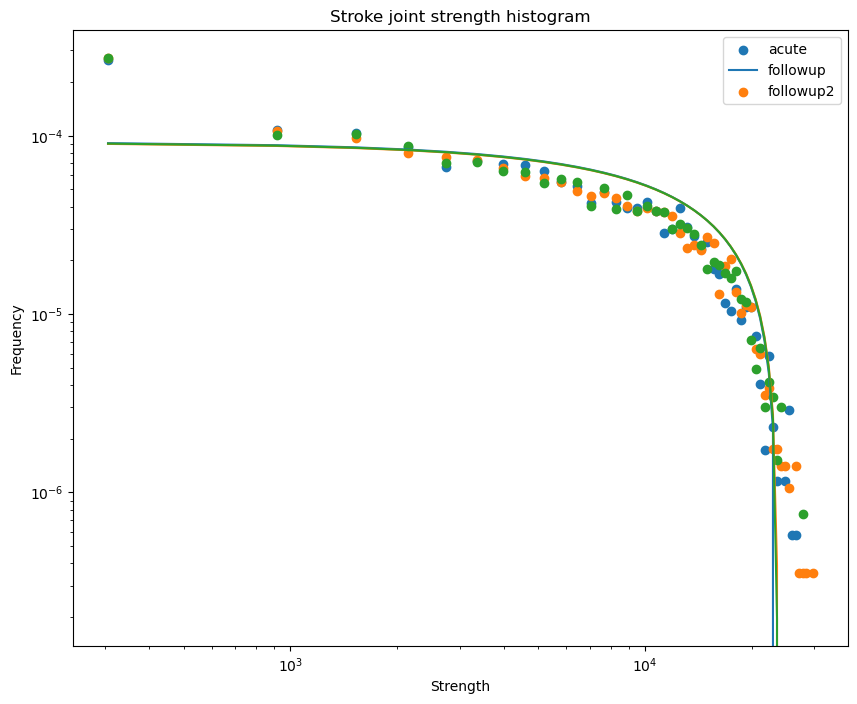

In [8]:
plt.figure(figsize=(10,8))
plt.title("Stroke joint strength histogram")
plt.xlabel("Strength")
plt.ylabel("Frequency")

bins_linear = np.linspace(0, 30000, 50)

for s in [strengths_stroke_acute_joint, strengths_stroke_followup_joint,
         strengths_stroke_followup2_joint]:
    #plt.hist(s, density=True, bins=bins, alpha=0.5)
    histCounts = np.histogram(s, bins=bins_linear, density=True)[0]
    binCenters = bins_linear[:-1] + np.diff(bins_linear) / 2
    
    plt.scatter(binCenters, histCounts)
    plt.plot(binCenters, odrout.beta[0] * binCenters + odrout.beta[1])



plt.legend(["acute", "followup", "followup2"])
plt.xscale("log")
plt.yscale("log")
plt.show()

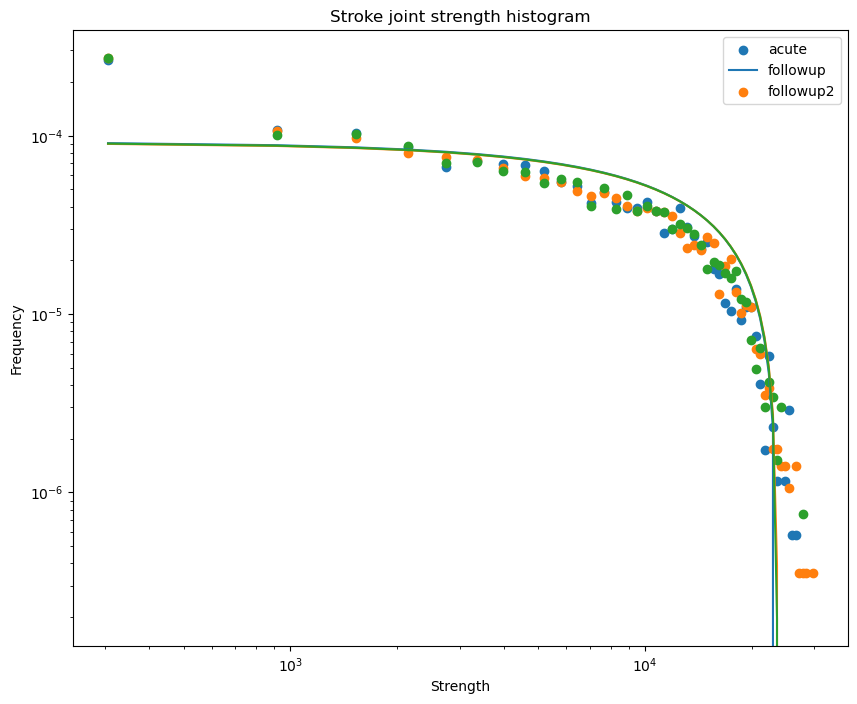

In [9]:
plt.figure(figsize=(10,8))
plt.title("Stroke joint strength histogram")
plt.xlabel("Strength")
plt.ylabel("Frequency")

bins_linear = np.linspace(0, 30000, 50)

for s in [strengths_stroke_acute_joint, strengths_stroke_followup_joint,
         strengths_stroke_followup2_joint]:
    #plt.hist(s, density=True, bins=bins, alpha=0.5)
    histCounts = np.histogram(s, bins=bins_linear, density=True)[0]
    binCenters = bins_linear[:-1] + np.diff(bins_linear) / 2
    
    odrdat = odr.Data(binCenters, histCounts)
    odrobj = odr.ODR(odrdat, odr.unilinear)
    odrout = odrobj.run()
    
    plt.scatter(binCenters, histCounts)
    plt.plot(binCenters, odrout.beta[0] * binCenters + odrout.beta[1])
    
    


plt.legend(["acute", "followup", "followup2"])
plt.xscale("log")
plt.yscale("log")
plt.show()

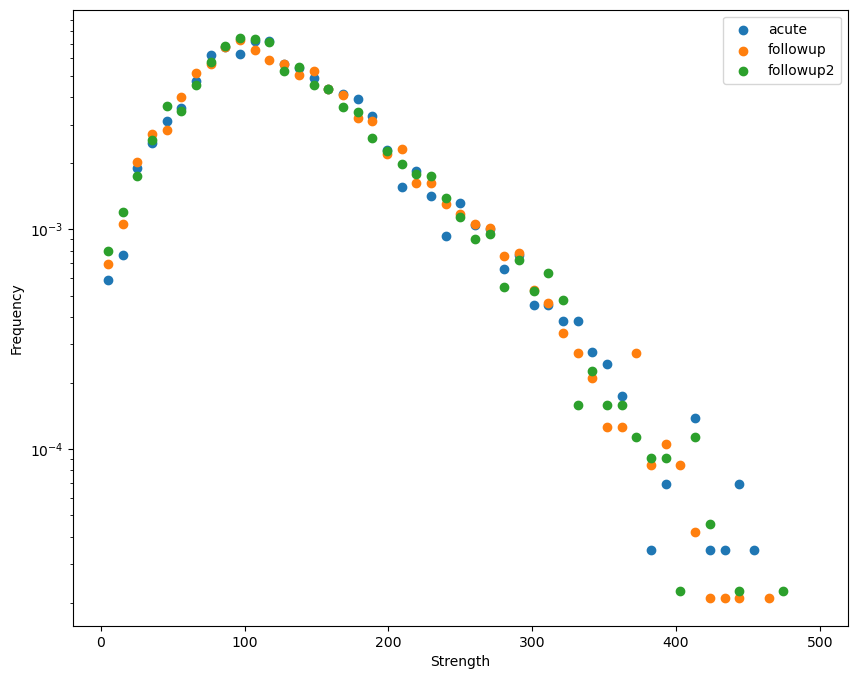

In [10]:
plt.figure(figsize=(10,8))
plt.xlabel("Strength")
plt.ylabel("Frequency")

bins_log1p = np.linspace(0, 500, 50)

for s in [strengths_stroke_acute_log1p_joint, strengths_stroke_followup_log1p_joint,
         strengths_stroke_followup2_log1p_joint]:
    histCounts = np.histogram(s, bins=bins_log1p, density=True)[0]
    #plt.hist(s, density=True, bins=bins, alpha=0.5)
    binCenters = bins_log1p[:-1] + np.diff(bins_log1p) / 2
    plt.scatter(binCenters, histCounts)

plt.legend(["acute", "followup", "followup2"])
plt.yscale("log")
plt.show()

## Fitting lines to strength distributions

### Raw weights (not log1p'd)

[ 9.80152263  9.83485905  9.86711991  9.89837245  9.9286778   9.95809169
  9.98666506 10.01444462 10.0414733  10.0677906  10.09343303 10.11843434
 10.14282579 10.16663644 10.1898933  10.21262155 10.23484469 10.25658468
 10.27786207 10.29869616] 20
[3.21887582 2.83321334 2.99573227 2.99573227 2.63905733 2.07944154
 1.38629436 2.39789527 1.60943791 1.09861229 0.         1.09861229
 1.79175947 0.69314718 0.69314718 0.         0.         0.
 0.         0.        ] 20
Beta: [-8.26274376 84.57859708]
Beta Std Error: [0.78763871 7.93192251]
Beta Covariance: [[  177.97071607 -1792.08367016]
 [-1792.08367016 18048.92613518]]
Residual Variance: 0.003485824822766309
Inverse Condition #: 0.0012529095689500348
Reason(s) for Halting:
  Sum of squares convergence
[ 9.80152263  9.83485905  9.86711991  9.89837245  9.9286778   9.95809169
  9.98666506 10.01444462 10.0414733  10.0677906  10.09343303 10.11843434
 10.14282579 10.16663644 10.1898933  10.21262155 10.23484469 10.25658468
 10.27786207 10.298696

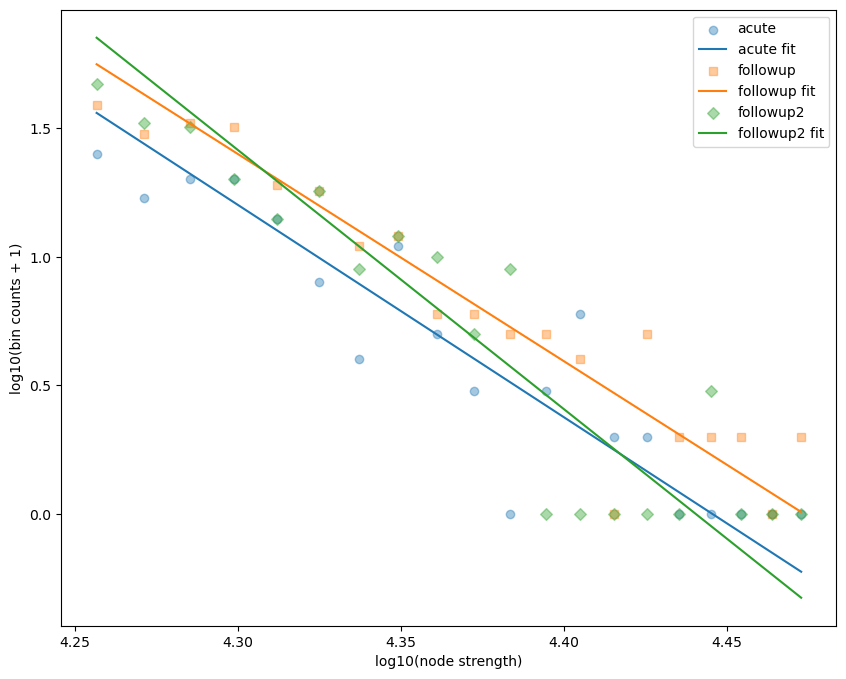

In [78]:
plt.figure(figsize=(10,8))
# plt.xlabel("ln(node strength)")
# plt.ylabel("ln(frequency + 1)")
plt.xlabel("log10(node strength)")
plt.ylabel("log10(bin counts + 1)")

odr_results_counts = []

for s, scatterSymb in zip([strengths_stroke_acute_joint, strengths_stroke_followup_joint,
         strengths_stroke_followup2_joint], ["o", "s", "D"]):
    # Do log10 on all data before plotting and fitting.
    binCenters = np.log(bins_linear[:-1] + np.diff(bins_linear) / 2)
    histCounts = np.log1p(np.histogram(s, bins=bins_linear)[0])

    #plt.scatter(binCenters, histCounts)
    
    thresh_low = 9.8
    binCenters_odr = binCenters[binCenters >= thresh_low]
    print(binCenters_odr, len(binCenters_odr))
    histCounts_odr = histCounts[binCenters >= thresh_low]

    print(histCounts_odr, len(histCounts_odr))
    
    odrdat = odr.Data(binCenters_odr, histCounts_odr)
    odrobj = odr.ODR(odrdat, odr.unilinear)
    odrout = odrobj.run()
    odr_results_counts.append(odrout)
    odrout.pprint()
    
    plt.scatter(binCenters_odr / np.log(10), histCounts_odr / np.log(10), marker=scatterSymb, alpha=0.4)
    plt.plot(binCenters_odr / np.log(10), (odrout.beta[0] * binCenters_odr + odrout.beta[1]) / np.log(10))

        
plt.legend(["acute", "acute fit", "followup", "followup fit", "followup2", "followup2 fit"])
plt.show()

In [84]:
print(np.abs(odr_results_counts[0].beta[0] - odr_results_counts[1].beta[0]) / np.sqrt(odr_results_counts[0].sd_beta[0]**2 + odr_results_counts[1].sd_beta[0]**2))
print(np.abs(odr_results_counts[0].beta[0] - odr_results_counts[2].beta[0]) / np.sqrt(odr_results_counts[0].sd_beta[0]**2 + odr_results_counts[2].sd_beta[0]**2))
print(np.abs(odr_results_counts[1].beta[0] - odr_results_counts[2].beta[0]) / np.sqrt(odr_results_counts[1].sd_beta[0]**2 + odr_results_counts[2].sd_beta[0]**2))

0.19957293874993987


## Clustering coefficient analysis

In [79]:
def analyze_clustering_patNums(graphDict):
    clusterDict = dict()
    clusteringAvgDict = dict()
    for patNum, g in graphDict.items():
        clusterDict[patNum] = nx.clustering(g, weight="weight")
        clusteringAvgDict[patNum] = nx.average_clustering(g, weight="weight")
    
    return clusterDict, clusteringAvgDict

In [80]:
clustCoefs_patNums_stroke_acute, clusteringAvg_patNums_stroke_acute = analyze_clustering_patNums(Gs_stroke_acute)
clustCoefs_patNums_stroke_followup, clusteringAvg_patNums_stroke_followup = analyze_clustering_patNums(Gs_stroke_followup)
clustCoefs_patNums_stroke_followup2, clusteringAvg_patNums_stroke_followup2 = analyze_clustering_patNums(Gs_stroke_followup2)

In [ ]:
clustCoefs_patNums_stroke_acute

In [81]:
clusteringAvg_patNums_stroke_acute_np = np.fromiter(clusteringAvg_patNums_stroke_acute.values(), dtype=float)
clusteringAvg_patNums_stroke_followup_np = np.fromiter(clusteringAvg_patNums_stroke_followup.values(), dtype=float)
clusteringAvg_patNums_stroke_followup2_np = np.fromiter(clusteringAvg_patNums_stroke_followup2.values(), dtype=float)

In [82]:
print(scipy.stats.describe(clusteringAvg_patNums_stroke_acute_np))
print(scipy.stats.describe(clusteringAvg_patNums_stroke_followup_np))
print(scipy.stats.describe(clusteringAvg_patNums_stroke_followup2_np))

DescribeResult(nobs=17, minmax=(0.0027782181190541973, 0.006135117958189849), mean=0.004171279368378793, variance=1.0165363522414093e-06, skewness=0.5477261409958883, kurtosis=-0.5195070711450183)
DescribeResult(nobs=28, minmax=(0.002538476187023814, 0.006347961612733156), mean=0.004321107931565813, variance=1.0677628184922998e-06, skewness=0.40429213251766205, kurtosis=-0.7239577219800766)
DescribeResult(nobs=26, minmax=(0.002669393482503841, 0.006411613023059067), mean=0.004520426614261622, variance=1.4274872600776827e-06, skewness=-0.25325521182486754, kurtosis=-1.1717238906351612)


In [83]:
def compare_array_means(a1, a2, verbose=False):
    meanDiffQuotVariances = np.abs(a1.mean()-a2.mean()) / np.sqrt(np.var(a1) + np.var(a2))
    
    return meanDiffQuotVariances


print("quotient, acute vs followup:", compare_array_means(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup_np))
print("quotient, acute vs followup2:", compare_array_means(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup2_np))
print("quotient, followup vs followup2:", compare_array_means(clusteringAvg_patNums_stroke_followup_np, clusteringAvg_patNums_stroke_followup2_np))

quotient, acute vs followup: 0.10630769504621271
quotient, acute vs followup2: 0.2287671542962316
quotient, followup vs followup2: 0.12860039774491422


### T-tests for average clustering coefficients

In [87]:
clusteringAvg_patNums_stroke_acute_np

array([0.00478684, 0.00311031, 0.00591512, 0.00395208, 0.00283038,
       0.00312451, 0.00613512, 0.00384746, 0.00448792, 0.00455079,
       0.00277822, 0.00564644, 0.00366649, 0.00408029, 0.00396743,
       0.00424194, 0.00379043])

In [89]:
print("T-test, acute vs followup: ", scipy.stats.ttest_ind(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup_np, equal_var=False))
print("T-test, acute vs followup2: ", scipy.stats.ttest_ind(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup2_np, equal_var=False))
print("T-test, followup vs followup2: ", scipy.stats.ttest_ind(clusteringAvg_patNums_stroke_followup_np, clusteringAvg_patNums_stroke_followup2_np, equal_var=False))

T-test, acute vs followup:  Ttest_indResult(statistic=-0.4787792423163451, pvalue=0.6351092612712561)
T-test, acute vs followup2:  Ttest_indResult(statistic=-1.0309263636924313, pvalue=0.3090521793025139)
T-test, followup vs followup2:  Ttest_indResult(statistic=-0.6534591239240144, pvalue=0.5164769349843528)


In [94]:
print(np.mean(clusteringAvg_patNums_stroke_followup_np))
print(np.std(clusteringAvg_patNums_stroke_followup_np))

0.004321107931565813
0.0010147060816401835


## Small world summary metrics ($\sigma$)

In [102]:
def analyze_smallworldness_patNums(graphDict):
    sigmaDict = dict()
    for patNum, g in graphDict.items():
        sigmaDict[patNum] = nx.sigma(g)
        print("Finished for patient PAT", patNum)
    
    return sigmaDict

In [103]:
# Don't run - will not finish in any reasonable time
#sigmas_stroke_acute = analyze_smallworldness_patNums(Gs_stroke_acute)

## Global and local efficiency, modularity

In [ ]:
# Copied from main.py
